In [ ]:
import pandas as pd
import numpy as np

In [ ]:
offer_info = pd.read_csv('offer_info.csv', index_col = 'offer_id')
offer_info.head()

,varietal
offer_id,
1,Malbec
2,Pinot Noir
3,Espumante
4,Champagne
5,Cabernet Sauvignon


In [ ]:
customer_offers = pd.read_csv('customer_offers.csv', index_col = 'customer_name')
customer_offers.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Allen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
Anderson,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
dict_names = offer_info.to_dict()['varietal']
dict_names = {str(i):dict_names[i] for i in dict_names}

In [ ]:
customer_offers = customer_offers.rename(columns = dict_names)
customer_offers

,Malbec,Pinot Noir,Espumante,Champagne,Cabernet Sauvignon,Prosecco,Prosecco,Espumante,Chardonnay,Prosecco,...,Chardonnay,Pinot Noir,Cabernet Sauvignon,Pinot Noir,Champagne,Cabernet Sauvignon,Pinot Grigio,Malbec,Champagne,Cabernet Sauvignon
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Allen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
Anderson,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Williams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Wilson,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
Wood,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.cluster import KMeans

model = KMeans( n_clusters = 3,
                random_state = 10) 

In [ ]:
names_columns = list(customer_offers.columns)
model.fit(customer_offers[names_columns])

KMeans(n_clusters=3, random_state=10)

In [ ]:
customer_offers['Cluster'] = model.labels_
customer_offers.head(3)

,Malbec,Pinot Noir,Espumante,Champagne,Cabernet Sauvignon,Prosecco,Prosecco,Espumante,Chardonnay,Prosecco,...,Pinot Noir,Cabernet Sauvignon,Pinot Noir,Champagne,Cabernet Sauvignon,Pinot Grigio,Malbec,Champagne,Cabernet Sauvignon,Cluster
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
Allen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
Anderson,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,2


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [ ]:
customer_offers['PC1'], customer_offers['PC2'] = zip(* pca.fit_transform(customer_offers[names_columns]))
customer_offers.head()

,Malbec,Pinot Noir,Espumante,Champagne,Cabernet Sauvignon,Prosecco,Prosecco,Espumante,Chardonnay,Prosecco,...,Pinot Noir,Champagne,Cabernet Sauvignon,Pinot Grigio,Malbec,Champagne,Cabernet Sauvignon,Cluster,PC1,PC2
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,-1.136174,-0.602891
Allen,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,-0.248630,0.293396
Anderson,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2,-1.229068,1.456962
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,-1.072021,-1.001048
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0.618998,-1.961426


<Figure size 1440x1440 with 0 Axes>

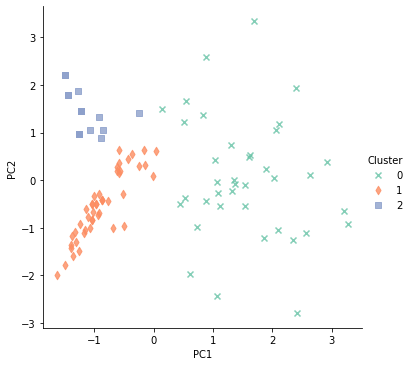

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,20))
sns.lmplot( x = 'PC1',
            y = 'PC2',
            data = customer_offers,
            hue = 'Cluster',
            markers = ['x','d','s'],
            fit_reg = False,
            palette="Set2")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=11bf7be5-3b62-4605-8e79-42e562c1fd79' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>